In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot # type: ignore
from tensorflow.keras.preprocessing.sequence import pad_sequences # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import ( # type: ignore
    Dense, Flatten, Embedding
)

In [18]:
reviews = [
    'nice food',
    'amazing restaurant',
    'too good',
    'just loved it!',
    'wil go again',
    'horrible food',
    'never go there',
    'poor service',
    'poor quality',
    'needs improvement'
]
sentiment = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [19]:
one_hot('amazing restaurant', 50)

[33, 27]

In [20]:
vocab_size = 50
encoded_reviews = [one_hot(d, vocab_size) for d in reviews]
encoded_reviews

[[33, 39],
 [33, 27],
 [14, 48],
 [45, 35, 1],
 [40, 9, 10],
 [11, 39],
 [20, 9, 41],
 [44, 34],
 [44, 42],
 [38, 10]]

In [21]:
max_length = 3
pad_reviews = pad_sequences(encoded_reviews, maxlen=max_length, padding='post')
pad_reviews

array([[33, 39,  0],
       [33, 27,  0],
       [14, 48,  0],
       [45, 35,  1],
       [40,  9, 10],
       [11, 39,  0],
       [20,  9, 41],
       [44, 34,  0],
       [44, 42,  0],
       [38, 10,  0]], dtype=int32)

In [23]:
embeded_vector_size = 5

model = Sequential()
model.add(Embedding (vocab_size, embeded_vector_size, name='embedding'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [24]:
X = pad_reviews
y = sentiment

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.fit(X, y, epochs=50)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step - accuracy: 0.5000 - loss: 0.6931
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5000 - loss: 0.6916
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5000 - loss: 0.6900
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5000 - loss: 0.6885
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5000 - loss: 0.6870
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6000 - loss: 0.6854
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7000 - loss: 0.6839
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7000 - loss: 0.6824
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7000 - loss: 0.6808
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7000 - loss: 0.6793
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7000 - loss: 0.6778
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7000 - loss: 0.6762


In [28]:
model.evaluate(X, y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 1.0000 - loss: 0.6105


[0.610487699508667, 1.0]

In [32]:
model.get_layer('embedding').get_weights()

[array([[-0.01251519,  0.04761438,  0.05473102, -0.06067507, -0.05576087],
        [-0.01597955, -0.04688846, -0.06524771,  0.0293393 ,  0.08119915],
        [-0.02601931, -0.04022754,  0.0459705 , -0.02103207,  0.04592158],
        [-0.00184783, -0.00618005,  0.03165657,  0.03313996, -0.04335139],
        [-0.03518007,  0.04915449, -0.03701051, -0.02135968, -0.01832493],
        [-0.04737426,  0.00371503, -0.0353541 ,  0.02586975,  0.04409995],
        [-0.02103354,  0.02930068,  0.01026649,  0.00978836, -0.04969363],
        [ 0.03533747, -0.04349077, -0.00313986, -0.02738012,  0.03297576],
        [ 0.03563556, -0.03329277,  0.02581156,  0.02833177, -0.02238574],
        [-0.00811962, -0.02196913, -0.02797825, -0.00171846, -0.010946  ],
        [-0.02264453, -0.039853  , -0.03191149,  0.03313933,  0.03106041],
        [-0.03870579, -0.04263269, -0.07856357,  0.06572665,  0.07438035],
        [ 0.04554487,  0.04408646,  0.0117199 , -0.03914547, -0.03444406],
        [-0.02567155,  0.

In [40]:
t = lambda sentence: pad_sequences([one_hot(sentence, n=vocab_size)], maxlen=max_length, padding='post')
x_new = t('bad movie') 
model.predict(x_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.4948958]], dtype=float32)

In [44]:
y_pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


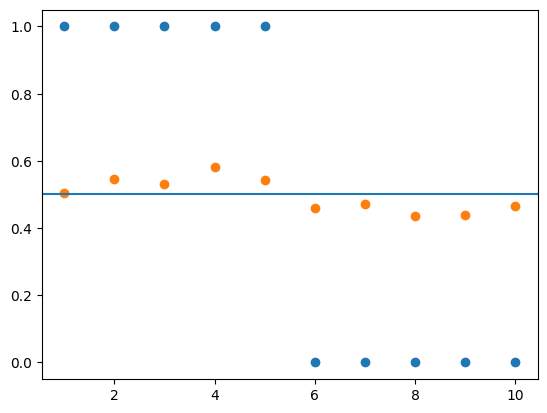

In [47]:
import matplotlib.pyplot as plt

plt.scatter(range(1, len(y)+1), y)
plt.scatter(range(1, len(y)+1), y_pred)
plt.axhline(y=0.5)
plt.show()
